In [33]:
%matplotlib inline
# %matplotlib notebook # for interactive

For high dpi displays.

In [34]:
%config InlineBackend.figure_format = 'retina' 

# 0. Note

* This notebook shows an example of EOS fitting for static compression, focusing on applying a range of different pressure scales.  

* The result and data have been published in [Nisr et al. (2017, JGR)](http://onlinelibrary.wiley.com/doi/10.1002/2016JE005158/full).

# 1. Setup

In [40]:
import numpy as np
from uncertainties import unumpy as unp
import pandas as pd
import pytheos as eos
import matplotlib.pyplot as plt

# 2. Setup pressure scale and starting values

Setup dictionaries for pressure standard `(au_eos)` and equation to use `(fit_model)`.  This allows for eos fits with a wide range of different pressure scales.

SiC has two polymorphs, 3C and 6H, at the studied pressure range.  This notebook can conduct fitting for 3C. 

Uncomment the following line to get some help.

In [36]:
#help(eos.gold.Yokoo2009)

We use the values from Zhuravlev (2013) for initial guess.

In [37]:
v0 = 82.804
k0 = 218.
k0p = 3.75

# 3. Setup data

Read data file.  Data points are stored in `csv` files.  

In [41]:
data = pd.read_csv('./data/3C-300EOS-final.csv')

In [42]:
data.head()

,V(Au),sV(Au),V(3C),sV(3C)
0,66.892301,0.067061,82.0691,0.0178
1,66.886692,0.066622,82.0611,0.0209
2,66.877331,0.066029,82.0333,0.0197
3,66.857521,0.064514,82.0232,0.0172
4,66.700591,0.063485,81.9191,0.0190


Sort the data in a reverse order based on the unit-cell volume of pressure standard.

In [43]:
n = data['V(Au)'].__len__()
ind = data['V(Au)'].argsort()[::-1][:n]

Make error propagation possible.

In [45]:
v_std = unp.uarray(data['V(Au)'][ind], data['sV(Au)'][ind])
v = unp.uarray(data['V(3C)'][ind], data['sV(3C)'][ind])

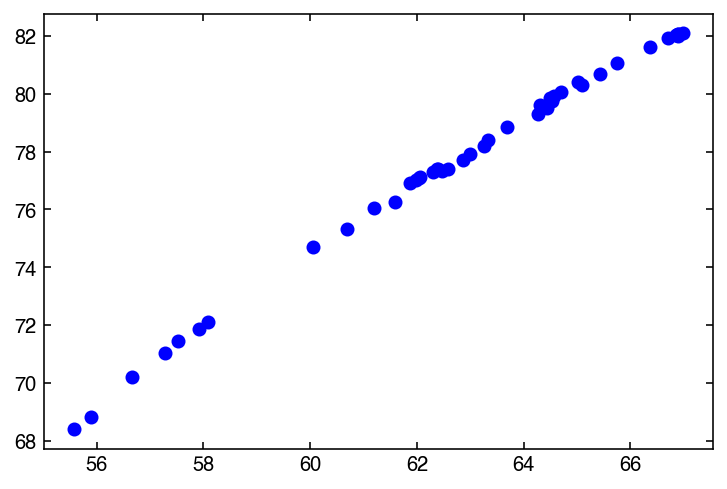

In [48]:
plt.plot(unp.nominal_values(v_std), unp.nominal_values(v), 'bo')

# 4. Fitting

Define dictionaries for a range of different fittings.

In [12]:
au_eos = {'Fei2007': eos.gold.Fei2007bm3(), 'Dorogokupets2007': eos.gold.Dorogokupets2007(),
          'Yokoo2009': eos.gold.Yokoo2009()}
fit_model = {'Fei2007': eos.BM3Model(), 'Dorogokupets2007': eos.VinetModel(),
             'Yokoo2009': eos.BM3Model()}

The cell below runs an iteration to generate fitting for three different pressure scales.  We fix `v0` in this fitting example.

In [26]:
key = 'Dorogokupets2007'

Set pressure standard to use

In [53]:
p = au_eos[key].cal_pst(v_std)

Plot volume versus pressure

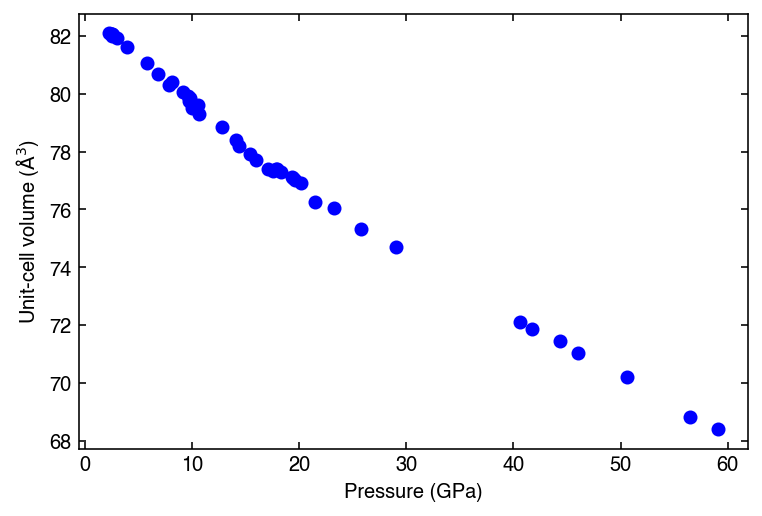

In [58]:
plt.plot(unp.nominal_values(p), unp.nominal_values(v), 'bo')
plt.xlabel('Pressure (GPa)')
plt.ylabel('Unit-cell volume ($\mathrm{\AA}^3$)');

Set equation to fit

In [28]:
model = fit_model[key]

Assign initial values for the parameters

In [29]:
params = model.make_params(v0=v0, k0=k0, k0p=k0p)

Fix v0

In [30]:
params['v0'].vary = False

Conduct fitting

In [31]:
fitresult = model.fit(unp.nominal_values(p), params, v=unp.nominal_values(v))

Generate text ouput for fitting result

***Dorogokupets2007
[[Model]]
    Model(vinet_p)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 44
    # variables        = 2
    chi-square         = 9.32151503
    reduced chi-square = 0.22194083
    Akaike info crit   = -64.2820363
    Bayesian info crit = -60.7136571
[[Variables]]
    v0:   82.804 (fixed)
    k0:   243.007065 +/- 2.23301264 (0.92%) (init = 218)
    k0p:  2.67891704 +/- 0.13083708 (4.88%) (init = 3.75)
[[Correlations]] (unreported correlations are < 0.100)
    C(k0, k0p) = -0.944



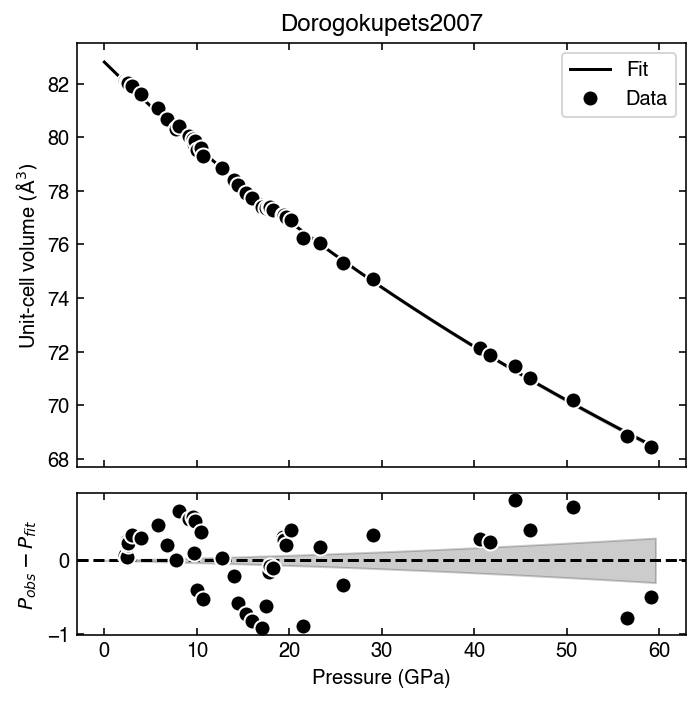

In [32]:
print('***'+key)
print(fitresult.fit_report())
# generate plots
eos.plot.static_fit_result(fitresult, title=key)